Laden van de data...
Done.
Formaat van de train_images: (60000, 28, 28)
Formaat van de train_labels: (60000,)
Formaat van de test_images: (10000, 28, 28)
Formaat van de test_labels: (10000,)
Grootte van de labels: 10
Plotten van een willekeurig plaatje uit de trainings-dataset


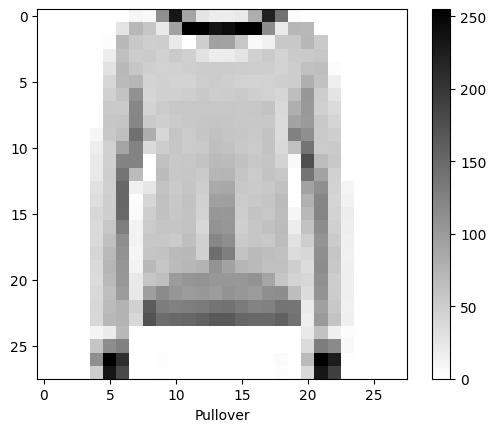

Druk op enter om verder te gaan...
Aanroepen van de methode scale_data met de matrix:
[[1 2 3 4]
 [2 2 4 4]
 [4 3 2 1]]
[[0.25 0.5  0.75 1.  ]
 [0.5  0.5  1.   1.  ]
 [1.   0.75 0.5  0.25]]
Het resultaat zou gelijk moeten zijn aan:
[[0.25 0.5  0.75 1.  ]
 [0.5  0.5  1.   1.  ]
 [1.   0.75 0.5  0.25]]
Druk op enter om verder te gaan...

Aanmaken van het model.
Trainen van het model...
Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5052 - accuracy: 0.8231
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3793 - accuracy: 0.8637
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.8766
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3121 - accuracy: 0.8868
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.8908
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2791 - accuracy: 0.8965
Trainin

<Figure size 640x480 with 0 Axes>

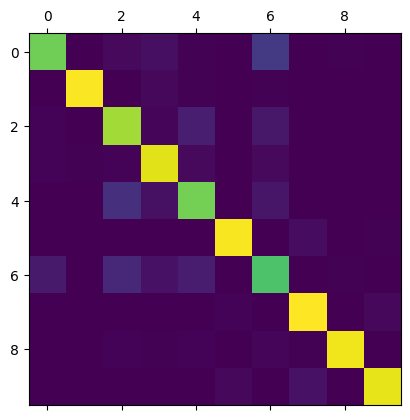

Bepalen van de tp, tn, fp, fn
[('T-shirt/topje', 759, 92, 241, 8908), ('Broek', 964, 7, 36, 8993), ('Pullover', 833, 283, 167, 8717), ('Jurk', 926, 174, 74, 8826), ('Jas', 764, 199, 236, 8801), ('Sandalen', 957, 32, 43, 8968), ('Shirt', 699, 337, 301, 8663), ('Sneaker', 968, 83, 32, 8917), ('Tas', 948, 14, 52, 8986), ('Lage laars', 933, 28, 67, 8972)]
Bepalen van de scores:
{'tpr': 0.8751, 'ppv': 0.8751, 'tnr': 0.9861222222222222, 'fpr': 0.013877777777777777}
Klaar...


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
import sys

"""
Als je een foutmelding krijgt met SSL, dan helpt dit onderstaande.
https://github.com/tensorflow/tensorflow/issues/33285
"""
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
"""
Tot hier (SSL error)
"""

# ==============================================
# HELPER FUNCTIES
def plot_matrix(data):
    plt.figure()
    plt.matshow(data)
    plt.show()


# ==== Laden van de data en zetten van belangrijke variabelen ====
print ("Laden van de data...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
labels = ['T-shirt/topje', 'Broek', 'Pullover', 'Jurk', 'Jas', 'Sandalen', 'Shirt', 'Sneaker', 'Tas', 'Lage laars']
print ("Done.")

print (f"Formaat van de train_images: {train_images.shape}")
print (f"Formaat van de train_labels: {train_labels.shape}")
print (f"Formaat van de test_images: {test_images.shape}")
print (f"Formaat van de test_labels: {test_labels.shape}")
print (f"Grootte van de labels: {len(labels)}")

# ===============  OPGAVE 1 ======================
# ===============  OPGAVE 1a ======================
print ("Plotten van een willekeurig plaatje uit de trainings-dataset")
if (len(sys.argv)>1 and sys.argv[1]=='skip') :
    print ("Slaan we over")
else:
    rnd = randint(0, train_images.shape[0])
    hyp = labels[train_labels[rnd]]
    plot_image(train_images[rnd], hyp)

input ("Druk op enter om verder te gaan...")

# ===============  OPGAVE 1b ======================
X = np.array( ([1,2,3,4],[2,2,4,4],[4,3,2,1]) )
r = X/4
print ("Aanroepen van de methode scale_data met de matrix:")
print (X)
print (scale_data(X))
print ("Het resultaat zou gelijk moeten zijn aan:")
print (r)

train_images = scale_data(train_images)
test_images = scale_data(test_images)

input ("Druk op enter om verder te gaan...")

# ===============  OPGAVE 1c ======================
print ("")
print ("Aanmaken van het model.")
model = build_model()
print ("Trainen van het model...")
model.fit(train_images, train_labels, epochs=6)
print ("Training afgerond.")

input ("Druk op enter om verder te gaan...")

# ===============  OPGAVE 2 ======================
print ("")
print ("Bepalen van de confusion matrix van het getrainde netwerk.")
pred = np.argmax(model.predict(test_images), axis=1)
conf_mtx = conf_matrix(test_labels, pred)

print ("De confusion matrix:")
print (conf_mtx)

if (len(sys.argv)>1 and sys.argv[1]=='skip') :
    print ("Tekenen slaan we over")
else:
    plot_matrix(conf_mtx)


print ("Bepalen van de tp, tn, fp, fn")
metrics = conf_els(conf_mtx.numpy(), labels)
print (metrics)
print ("Bepalen van de scores:")
scores = conf_data(metrics)
print (scores)


print ("Klaar...")

In [1]:
# OPGAVE 1a
def plot_image(img, label):
    # Deze methode krijgt een matrix mee (in img) en een label dat correspondeert met het
    # plaatje dat in de matrix is weergegeven. Zorg ervoor dat dit grafisch wordt weergegeven.
    # Maak gebruik van plt.cm.binary voor de cmap-parameter van plt.imgshow.

    # YOUR CODE HERE
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [3]:
# OPGAVE 1b
def scale_data(X):
    # Deze methode krijgt een matrix mee waarin getallen zijn opgeslagen van 0..m, en hij
    # moet dezelfde matrix retourneren met waarden van 0..1. Deze methode moet werken voor
    # alle maximale waarde die in de matrix voorkomt.
    # Deel alle elementen in de matrix 'element wise' door de grootste waarde in deze matrix.

    # YOUR CODE HERE
    max_value = np.amax(X)
    scaled_X = X / max_value

    return scaled_X

In [5]:
# OPGAVE 1c
def build_model():
    # Deze methode maakt het keras-model dat we gebruiken voor de classificatie van de mnist
    # dataset. Je hoeft deze niet abstract te maken, dus je kunt er van uitgaan dat de input
    # layer van dit netwerk alleen geschikt is voor de plaatjes in de opgave (wat is de
    # dimensionaliteit hiervan?).
    # Maak een model met een input-laag, een volledig verbonden verborgen laag en een softmax
    # output-laag. Compileer het netwerk vervolgens met de gegevens die in opgave gegeven zijn
    # en retourneer het resultaat.

    # Het staat je natuurlijk vrij om met andere settings en architecturen te experimenteren.

    # YOUR CODE HERE

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input-laag voor 28x28 plaatjes
        tf.keras.layers.Dense(128, activation=tf.nn.relu),  # Verborgen laag met ReLU-activatie
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output-laag met softmax-activatie voor classificatie
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [8]:
# OPGAVE 2a
def conf_matrix(labels, pred):
    # Retourneer de econfusion matrix op basis van de gegeven voorspelling (pred) en de actuele
    # waarden (labels). Check de documentatie van tf.math.confusion_matrix:
    # https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

    # YOUR CODE HERE
    confusion = tf.math.confusion_matrix(labels, pred)
    return confusion

In [9]:
# OPGAVE 2b
def conf_els(conf, labels):
    # Deze methode krijgt een confusion matrix mee (conf) en een set van labels. Als het goed is, is
    # de dimensionaliteit van de matrix gelijk aan len(labels) × len(labels) (waarom?). Bereken de
    # waarden van de TP, FP, FN en TN conform de berekening in de opgave. Maak vervolgens gebruik van
    # de methodes zip() en list() om een list van len(labels) te retourneren, waarbij elke tupel
    # als volgt is gedefinieerd:

    #     (categorie:string, tp:int, fp:int, fn:int, tn:int)

    # Check de documentatie van numpy diagonal om de eerste waarde te bepalen.
    # https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

    # YOUR CODE HERE
    conf = np.array(conf)
    conf = np.array(conf, dtype=int)

    conf_els_list = []

    for i in range(len(labels)):
        category = labels[i]  # Huidige categorie
        tp = conf[i, i]  # True Positives
        fp = np.sum(conf[:, i]) - tp  # False Positives
        fn = np.sum(conf[i, :]) - tp  # False Negatives
        tn = np.sum(np.delete(np.delete(conf, i, axis=0), i, axis=1))  # True Negatives

        conf_els_list.append((category, tp, fp, fn, tn))

    return conf_els_list

In [10]:
# OPGAVE 2c
def conf_data(metrics):
    # Deze methode krijgt de lijst mee die je in de vorige opgave hebt gemaakt (dus met lengte len(labels))
    # Maak gebruik van een list-comprehension om de totale tp, fp, fn, en tn te berekenen en
    # bepaal vervolgens de metrieken die in de opgave genoemd zijn. Retourneer deze waarden in de
    # vorm van een dictionary (de scaffold hiervan is gegeven).

    # Bereken de totale waarden voor TP, FP, FN en TN over alle labels
    total_tp = sum(tp for _, tp, _, _, _ in metrics)
    total_fp = sum(fp for _, _, fp, _, _ in metrics)
    total_fn = sum(fn for _, _, _, fn, _ in metrics)
    total_tn = sum(tn for _, _, _, _, tn in metrics)

    # Bereken de metrieken op basis van de totale waarden
    tpr = total_tp / (total_tp + total_fn)  # True Positive Rate (Recall)
    ppv = total_tp / (total_tp + total_fp)  # Positive Predictive Value (Precision)
    tnr = total_tn / (total_tn + total_fp)  # True Negative Rate
    fpr = total_fp / (total_tn + total_fp)  # False Positive Rate

    return {'tpr': tpr, 'ppv': ppv, 'tnr': tnr, 'fpr': fpr}